# COVID19-India-Analysis [Kaggle Notebook](https://www.kaggle.com/samacker77k/covid19-india-analysis)
A notebook dedicated to data visualization and analysis of COVID19 Pandemic in India.

---

This notebook visualizes the effects of COVID19 pandemic in India to help understand the effect of the outbreak demographically.

Maintained by:
* Shivani Tyagi [LinkedIn](https://www.linkedin.com/in/shivani-tyagi-09/) [Github](https://github.com/shivitg)
* Nitika Kamboj [LinkedIn](https://linkedin.com/in/nitika-kamboj) [Github](https://github.com/nitika-kamboj)
* Samar Srivastava [LinkedIn](https://linkedin.com/in/samacker77l) [Github](https://github.com/samacker77)
 


---

### Fetching Data 
---

In [14]:
import requests
import pandas as pd
import logging
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(font_scale=1.4)

### Enable logging

In [2]:
loggers = {}

def get_logger(name):
    
    global loggers

    if loggers.get(name):
        return loggers.get(name)
    else:
        logger = logging.getLogger(name)
        logger.setLevel(logging.DEBUG)
        now = datetime.datetime.now()
        handler = logging.StreamHandler()
        formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        loggers[name] = logger
        return logger
    
logger = get_logger('COVID19 India Analysis Logger')

In [3]:
def fetch_data():
    url = 'http://portal.covid19india.org/export?_export=json'
    response = requests.get(url=url)
    if response.status_code == 200:
        logger.info('Connection enabled. Fetching data...')
        fetched_data = response.json()
        data = pd.DataFrame(fetched_data)
        print("Data fetched.")
        return data
    else:
        print('Connection failed. Please retry.')
        return

In [4]:
data = fetch_data()

2020-03-24 15:07:18,598 INFO Connection enabled. Fetching data...


Data fetched.


---
#### Now we have fetched data successfully. Now we will inspect the data. 

In [5]:
print("Data Shape ~ Rows = {} | Columns = {}".format(data.shape[0],data.shape[1]))

Data Shape ~ Rows = 504 | Columns = 19


#### Checking dtypes

In [6]:
data.dtypes

Age                    float64
Contacts                object
Created on              object
Current location        object
Current location pt     object
Current status          object
Detected city           object
Detected city pt        object
Detected district       object
Detected state          object
Diagnosed date          object
Gender                  object
Government id           object
ID                       int64
Nationality             object
Notes                   object
Status change date      object
Unique id               object
Updated on              object
dtype: object

> On first look we see that the attributes 'ID' and 'Unique ID' are same. So we check if they have any values that are different. Before that we convert 'Unique ID' to int64 and compare. 

In [7]:
data['Unique id'] = data['Unique id'].astype('int64')

In [8]:
data[data['ID'] == data['Unique id']]

,Age,Contacts,Created on,Current location,Current location pt,Current status,Detected city,Detected city pt,Detected district,Detected state,Diagnosed date,Gender,Government id,ID,Nationality,Notes,Status change date,Unique id,Updated on
0,20.0,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (76.21325419999999 10.5256264),Recovered,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,30/Jan/2020,Female,KL-TS-P1,1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,1,03/23/2020 12:20 p.m.
1,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (76.333482 9.498000100000001),Recovered,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,02/Feb/2020,Unknown,KL-AL-P1,2,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,2,03/23/2020 12:20 p.m.
2,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (80 20),Recovered,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,03/Feb/2020,Unknown,KL-KS-P1,3,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,3,03/23/2020 12:20 p.m.
3,45.0,"Patient 22:, Patient 23:, Patient 24:, Patient...",03/23/2020 12:20 p.m.,None,SRID=4326;POINT (80 20),Recovered,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,02/Mar/2020,Male,DL-P1,4,India,"Travelled from Austria, Italy.\nTravel history...",03/15/2020,4,03/23/2020 12:20 p.m.
4,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (78.4349398685041 17.4263524),Recovered,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,02/Mar/2020,Unknown,TS-P1,5,India,"Travelled from Dubai, Singapore contact.\nTrav...",03/02/2020,5,03/23/2020 12:20 p.m.
5,69.0,"Patient 7:, Patient 8:, Patient 9:, Patient 10...",03/23/2020 12:20 p.m.,None,SRID=4326;POINT (75.82034899999999 26.916194),Recovered,Jaipur,SRID=4326;POINT (75.82034899999999 26.916194),Jaipur,Rajasthan,03/Mar/2020,Male,None,6,Italy,Travelled from Italy.\nItalian tourist,03/03/2020,6,03/23/2020 12:20 p.m.
6,55.0,Patient 6:,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (77.0299194 28.4646148),Hospitalized,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,04/Mar/2020,Unknown,None,7,Italy,Travelled from Italy.\nItalian tourist,03/04/2020,7,03/23/2020 12:34 p.m.
7,55.0,Patient 6:,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (77.0299194 28.4646148),Hospitalized,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,04/Mar/2020,Unknown,None,8,Italy,Travelled from Italy.\nItalian tourist,03/04/2020,8,03/23/2020 12:34 p.m.
8,55.0,Patient 6:,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (77.0299194 28.4646148),Hospitalized,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,04/Mar/2020,Unknown,None,9,Italy,Travelled from Italy.\nItalian tourist,03/04/2020,9,03/23/2020 12:34 p.m.
9,55.0,Patient 6:,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (77.0299194 28.4646148),Hospitalized,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,04/Mar/2020,Unknown,None,10,Italy,Travelled from Italy.\nItalian tourist,03/04/2020,10,03/23/2020 12:34 p.m.


> Since we have same values in both columns. We can drop one of them and make another as the index

In [9]:
data.drop('Unique id',axis=1,inplace=True)

In [10]:
data.set_index('ID',inplace=True)

In [11]:
print("Data Shape ~ Rows = {} | Columns = {}".format(data.shape[0],data.shape[1]))

Data Shape ~ Rows = 504 | Columns = 17


In [12]:
data.head()

,Age,Contacts,Created on,Current location,Current location pt,Current status,Detected city,Detected city pt,Detected district,Detected state,Diagnosed date,Gender,Government id,Nationality,Notes,Status change date,Updated on
ID,,,,,,,,,,,,,,,,,
1,20.0,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (76.21325419999999 10.5256264),Recovered,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,30/Jan/2020,Female,KL-TS-P1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,03/23/2020 12:20 p.m.
2,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (76.333482 9.498000100000001),Recovered,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,02/Feb/2020,Unknown,KL-AL-P1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,03/23/2020 12:20 p.m.
3,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (80 20),Recovered,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,03/Feb/2020,Unknown,KL-KS-P1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,03/23/2020 12:20 p.m.
4,45.0,"Patient 22:, Patient 23:, Patient 24:, Patient...",03/23/2020 12:20 p.m.,None,SRID=4326;POINT (80 20),Recovered,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,02/Mar/2020,Male,DL-P1,India,"Travelled from Austria, Italy.\nTravel history...",03/15/2020,03/23/2020 12:20 p.m.
5,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (78.4349398685041 17.4263524),Recovered,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,02/Mar/2020,Unknown,TS-P1,India,"Travelled from Dubai, Singapore contact.\nTrav...",03/02/2020,03/23/2020 12:20 p.m.


#### Now the data is ready for analysis and preprocessing

> Graph between the count of affected people and Nationality.

In [15]:
data['Nationality'].value_counts()

India             307
Italy              18
Indonesia          10
United Kingdom      7
Indian              2
Phillipines         2
Thailand            2
Canada              1
Name: Nationality, dtype: int64

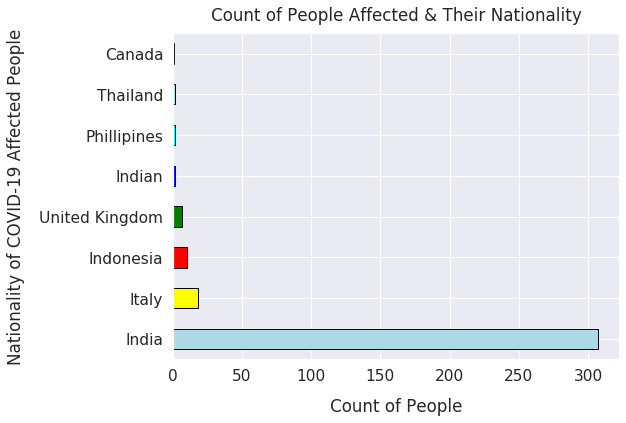

In [16]:
data['Nationality'].value_counts().plot(kind='barh', figsize=(8, 6), edgecolor='black',
                                              color=['lightblue', 'yellow','red', 'green', 'blue', 'cyan']);
plt.ylabel("Nationality of COVID-19 Affected People", labelpad=14)
plt.xlabel("Count of People", labelpad=14)
plt.title("Count of People Affected & Their Nationality", y=1.02);

> We can see from above graph that 'India' and 'Indian' are same nationality. We can replace 'Indian' with 'India'

In [17]:
data['Nationality']=data['Nationality'].replace('Indian','India')

In [18]:
data['Nationality'].value_counts()

India             309
Italy              18
Indonesia          10
United Kingdom      7
Phillipines         2
Thailand            2
Canada              1
Name: Nationality, dtype: int64

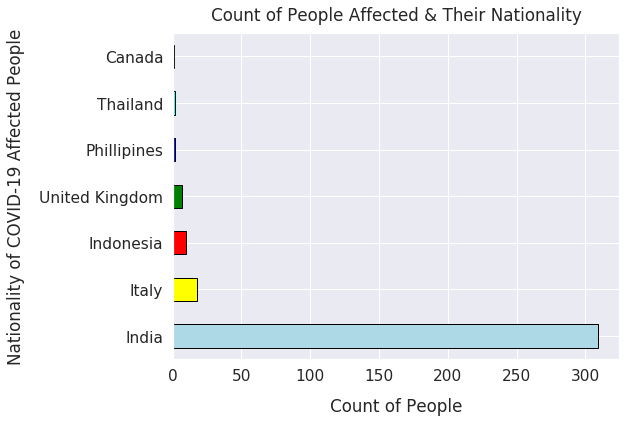

In [19]:
data['Nationality'].value_counts().plot(kind='barh', figsize=(8, 6), edgecolor='black',
                                              color=['lightblue', 'yellow','red', 'green', 'blue', 'cyan']);
plt.ylabel("Nationality of COVID-19 Affected People", labelpad=14)
plt.xlabel("Count of People", labelpad=14)
plt.title("Count of People Affected & Their Nationality", y=1.02);

> Graph between gender and count of affected people.

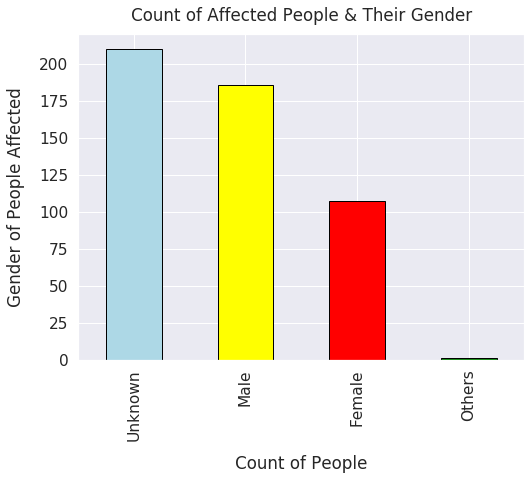

In [22]:
data['Gender'].value_counts().plot(kind='bar', figsize=(8, 6), edgecolor='black',
                                              color=['lightblue', 'yellow','red', 'green', 'blue', 'cyan']);

plt.ylabel("Gender of People Affected", labelpad=14)
plt.xlabel("Count of People", labelpad=14)
plt.title("Count of Affected People & Their Gender", y=1.02);

> Graph between different states and number of detected cases.

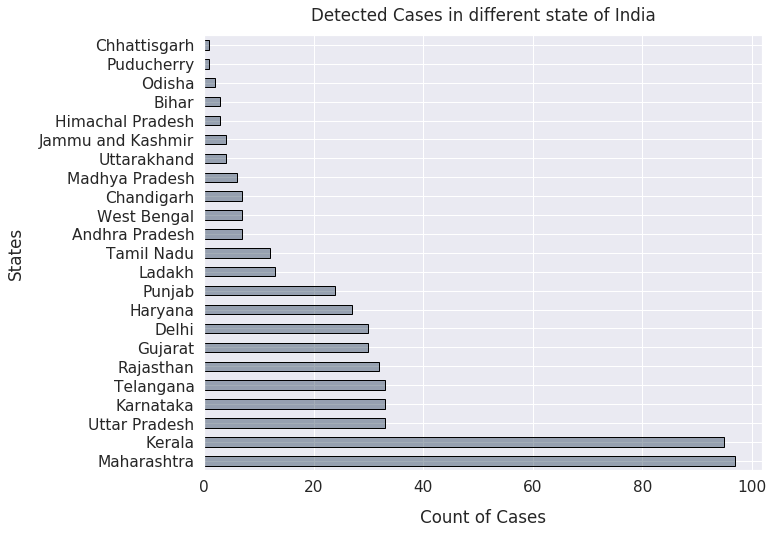

In [23]:
data['Detected state'].value_counts().plot(kind='barh', figsize=(10, 8), edgecolor='black',
                                              color=(0.1, 0.2, 0.3, 0.4));
plt.ylabel("States", labelpad=14)
plt.xlabel("Count of Cases", labelpad=14)
plt.title("Detected Cases in different state of India", y=1.02);

> Graph between status of affected people.

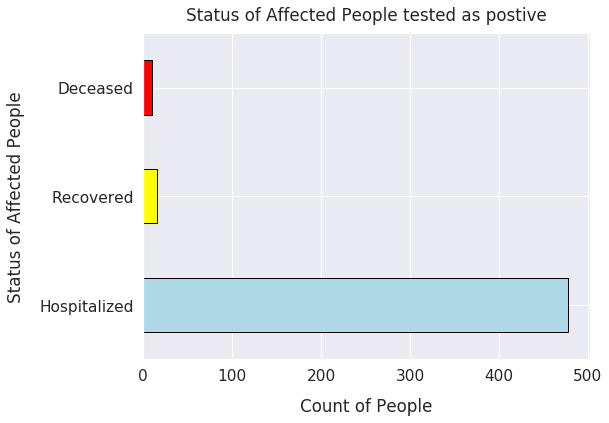

In [95]:
data['Current status'].value_counts().plot(kind='bar', figsize=(8, 6), edgecolor='black',
                                              color=['lightblue', 'yellow','red', 'green', 'blue', 'cyan']);

plt.ylabel("Status of Affected People", labelpad=14)
plt.xlabel("Count of People", labelpad=14)
plt.title("Status of Affected People tested as postive", y=1.02);

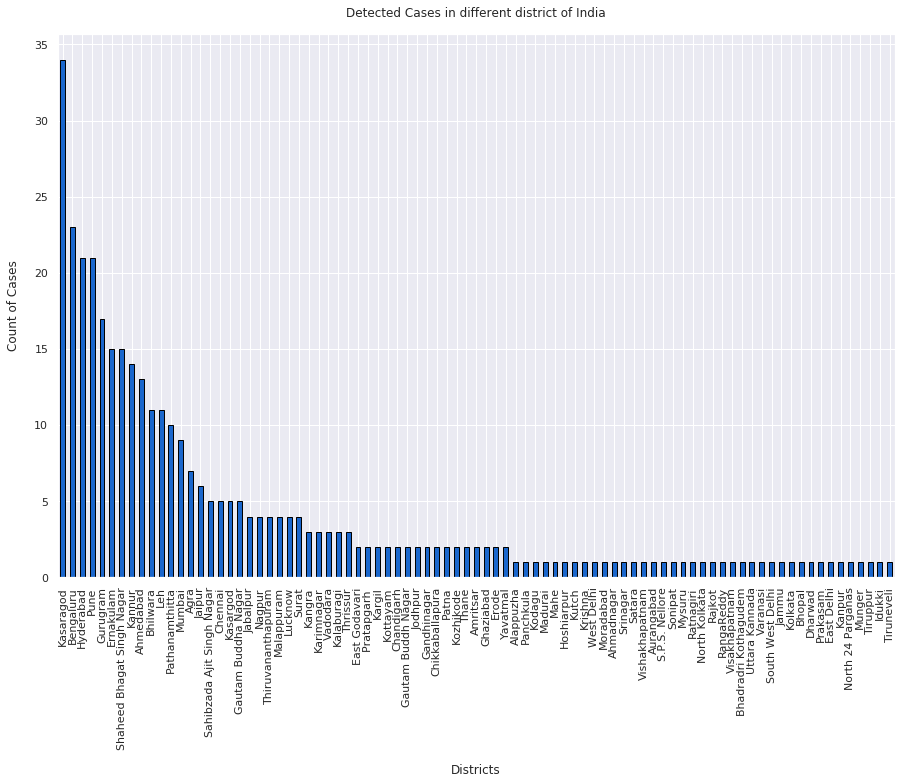

In [96]:
sns.set(font_scale=1.0)
data['Detected district'].value_counts().plot(kind='bar', figsize=(15, 10), edgecolor='black',
                                              color=(0.1, 0.4, 0.8, 1));
plt.xlabel("Districts", labelpad=14)
plt.ylabel("Count of Cases", labelpad=14)
plt.title("Detected Cases in different district of India", y=1.02);

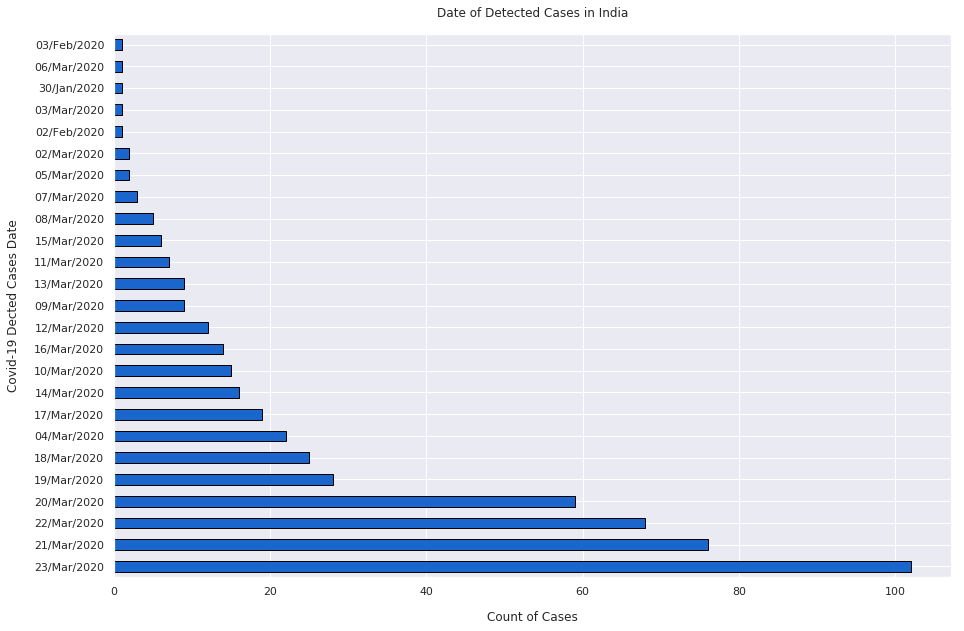

In [97]:
data['Diagnosed date'].value_counts().plot(kind='barh', figsize=(15, 10), edgecolor='black',
                                              color=(0.1, 0.4, 0.8, 1));
plt.ylabel("Covid-19 Dected Cases Date", labelpad=14)
plt.xlabel("Count of Cases", labelpad=14)
plt.title("Date of Detected Cases in India", y=1.02);

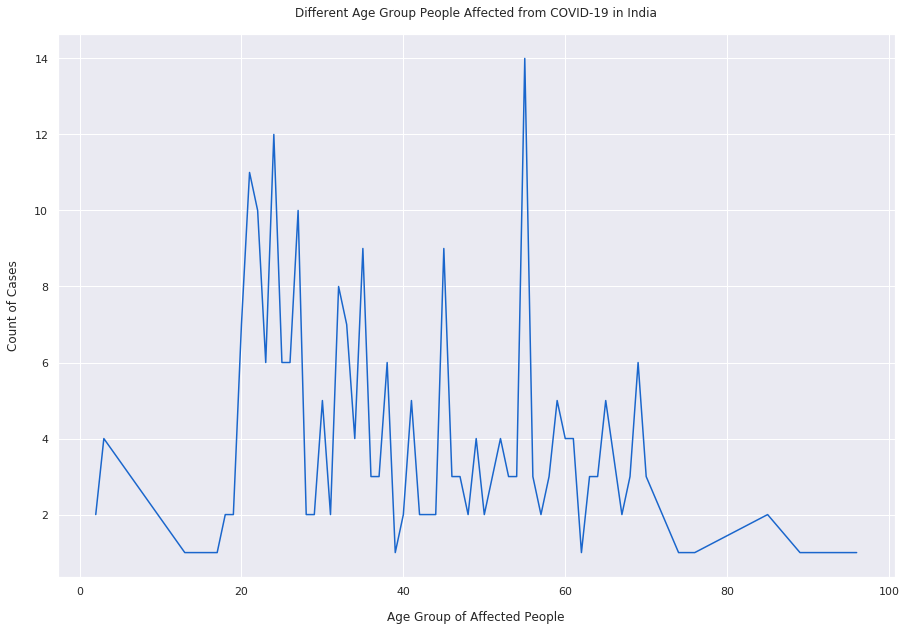

In [98]:
data.groupby('Age').count()['Diagnosed date'].plot(figsize=(15, 10),
                                              color=(0.1, 0.4, 0.8, 1))
plt.xlabel("Age Group of Affected People", labelpad=14)
plt.ylabel("Count of Cases", labelpad=14)
plt.title("Different Age Group People Affected from COVID-19 in India", y=1.02);